In [1]:
# Reading Data & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Building Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [2]:
# Reading Data

data = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\laptop_data.csv")
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data["Ram"] = data["Ram"].str.replace("GB", "")
data["Weight"] = data["Weight"].str.replace("kg", "")

In [4]:
for col in data.columns:
    
    print(data[col].value_counts())
    
    print("------------")

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
------------
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
------------
Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
------------
ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080              

In [5]:
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [6]:
data["Ram"] = data["Ram"].astype("float32")
data["Weight"] = data["Weight"].astype("float32")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float32
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(2), float64(2), object(7)
memory usage: 101.9+ KB


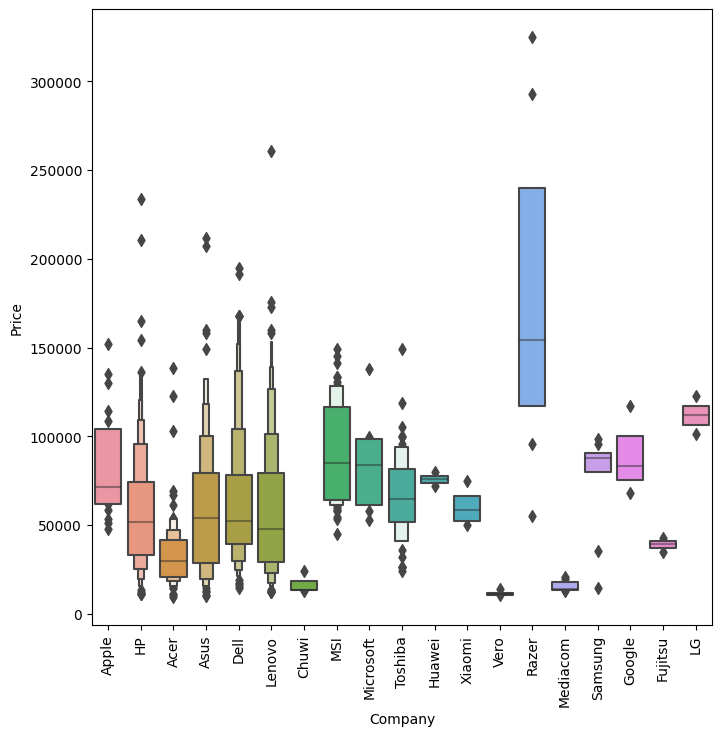

In [8]:
plt.figure(figsize=(8, 8))
sns.boxenplot(x=data["Company"], y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

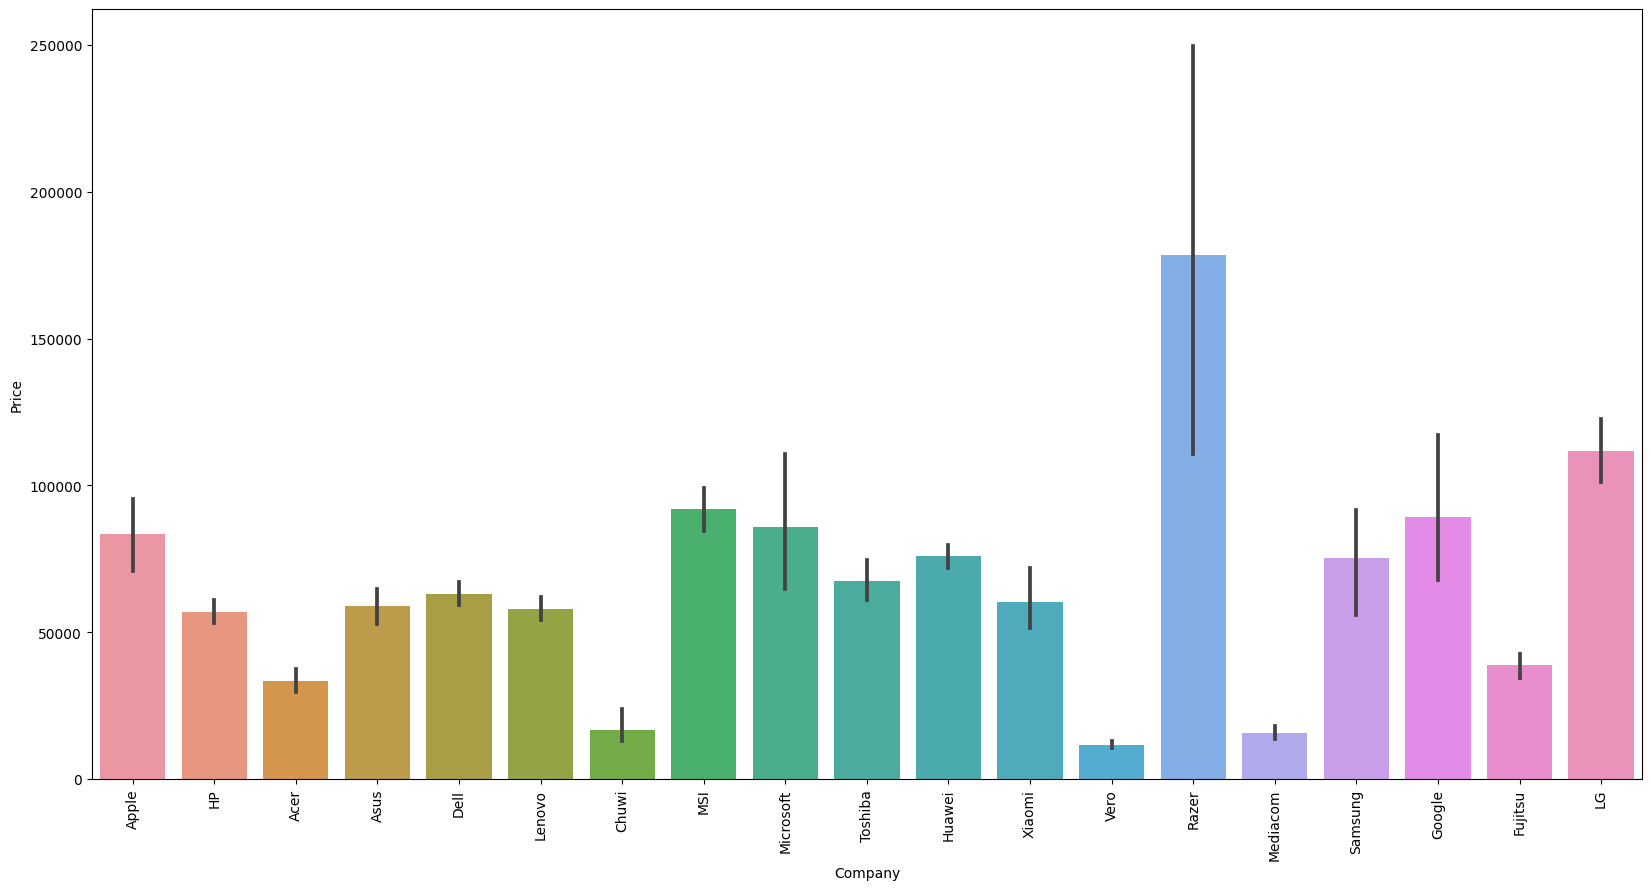

In [9]:
plt.figure(figsize=(20, 10))
sns.barplot(x=data["Company"], y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

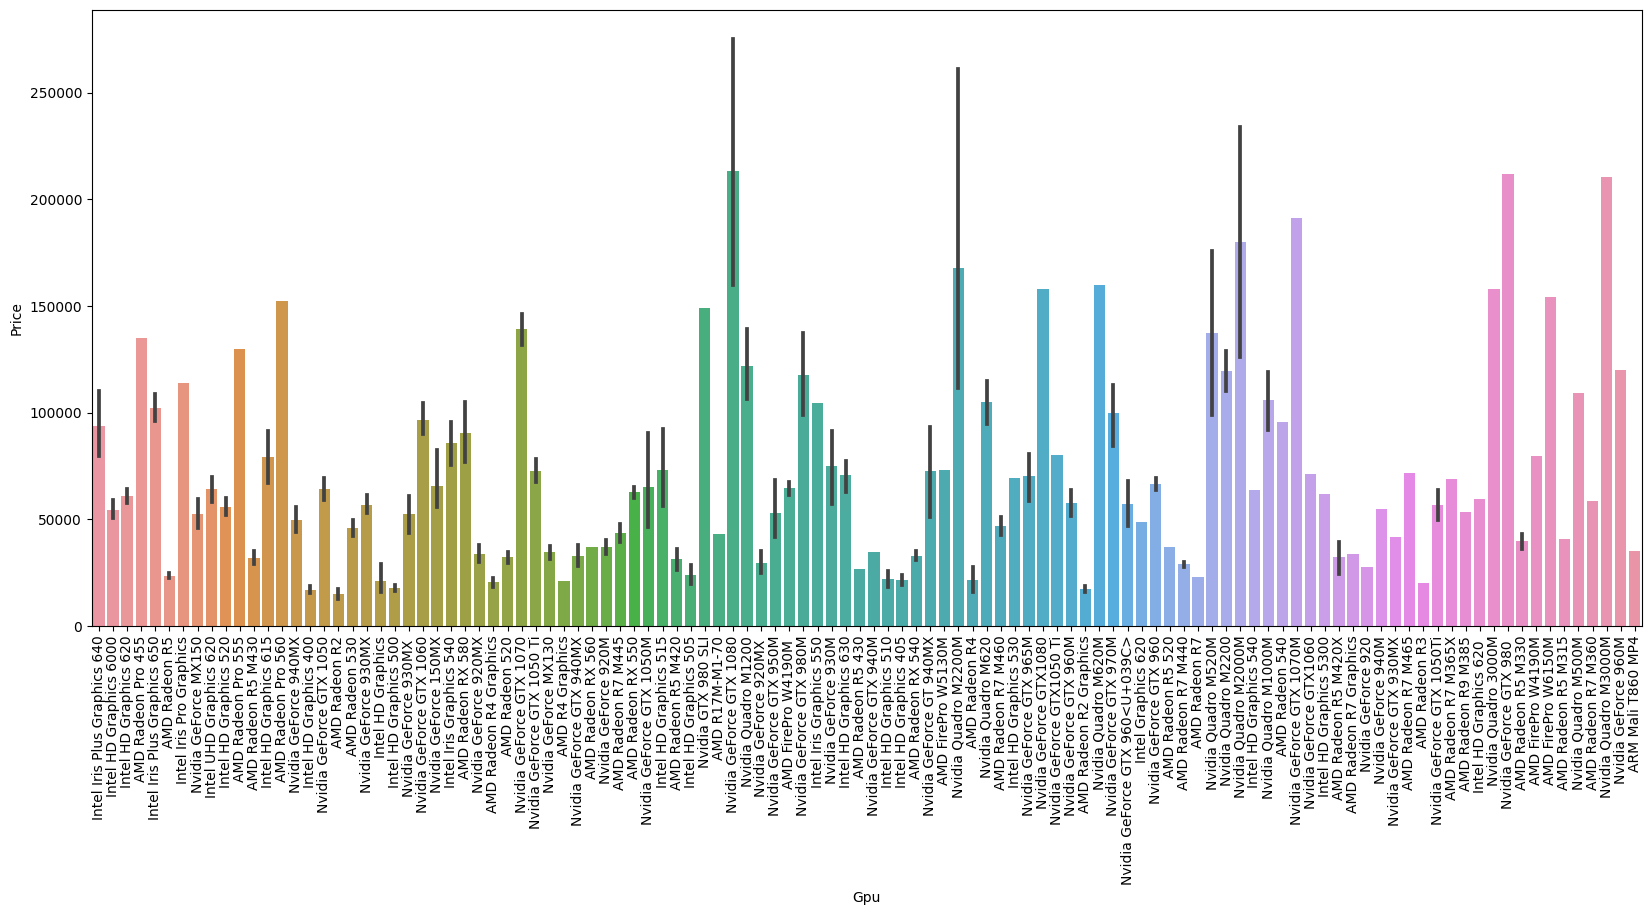

In [10]:
plt.figure(figsize=(20, 8))
sns.barplot(x=data["Gpu"], y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

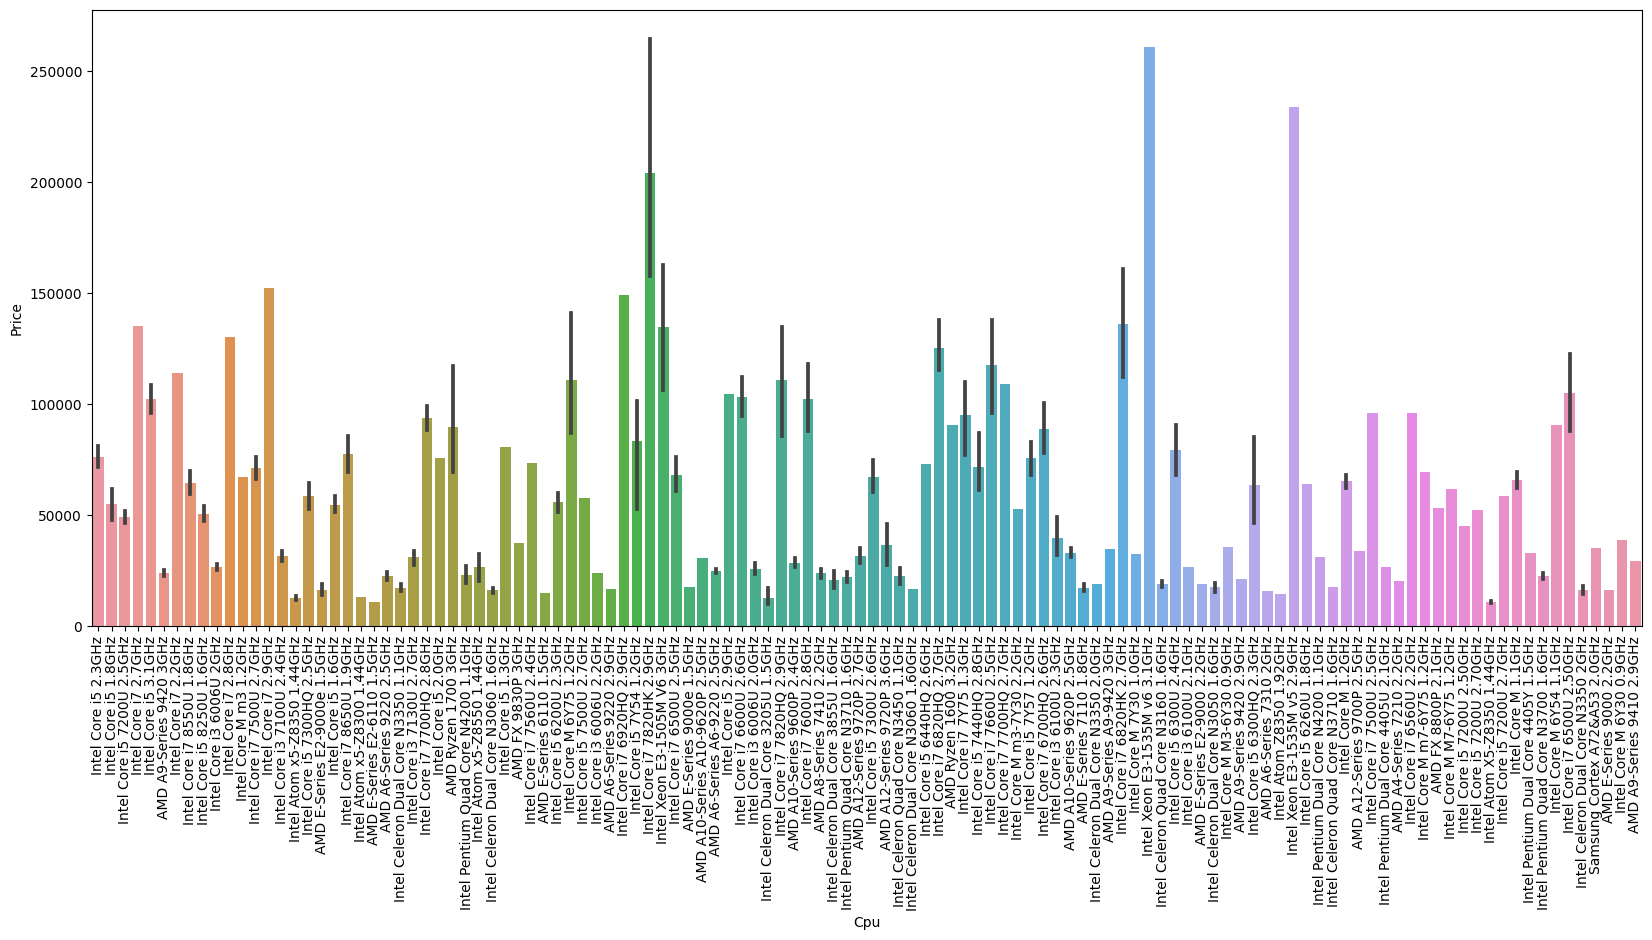

In [11]:
plt.figure(figsize=(20, 8))
sns.barplot(x=data["Cpu"], y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

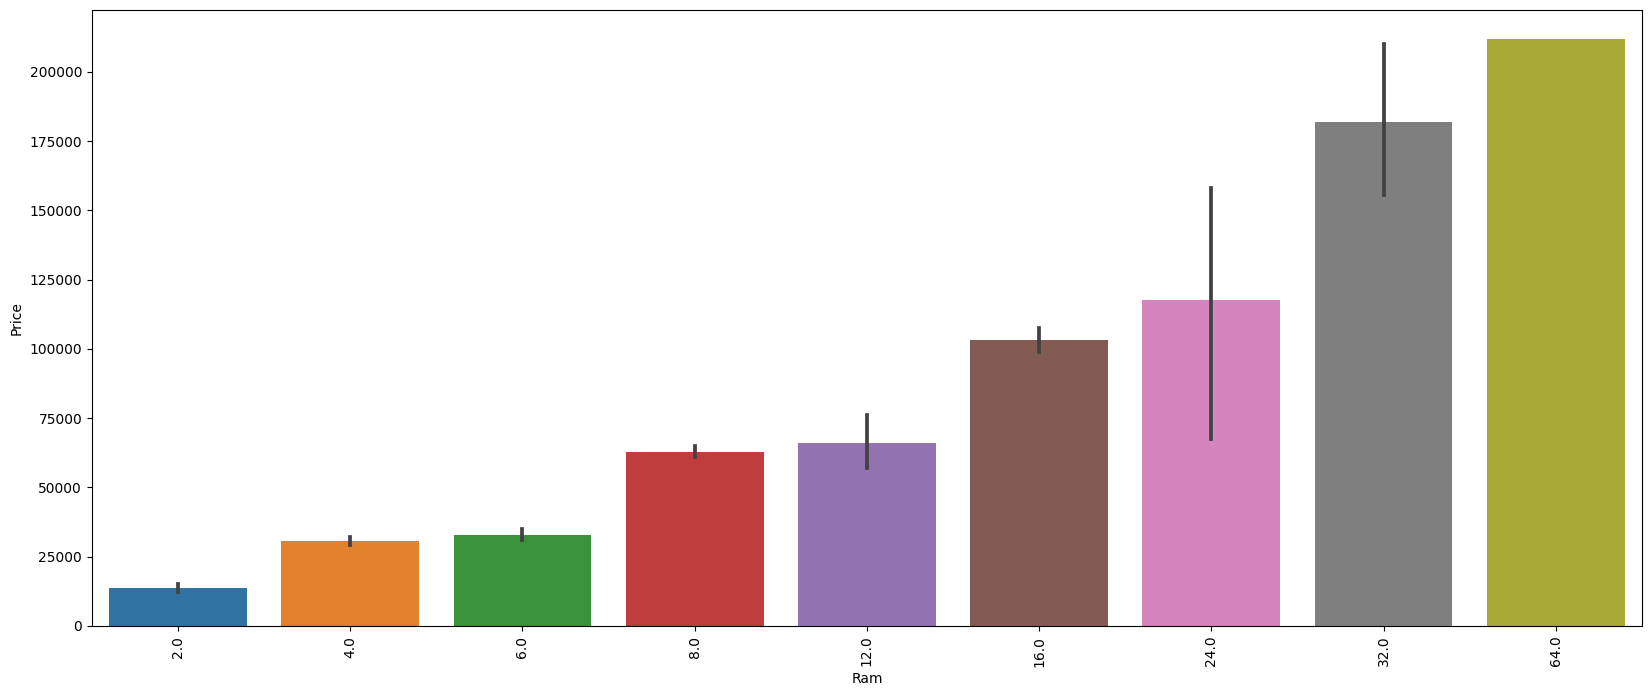

In [12]:
plt.figure(figsize=(20, 8))
sns.barplot(x=data["Ram"], y=data["Price"])
plt.xticks(rotation="vertical")
plt.show()

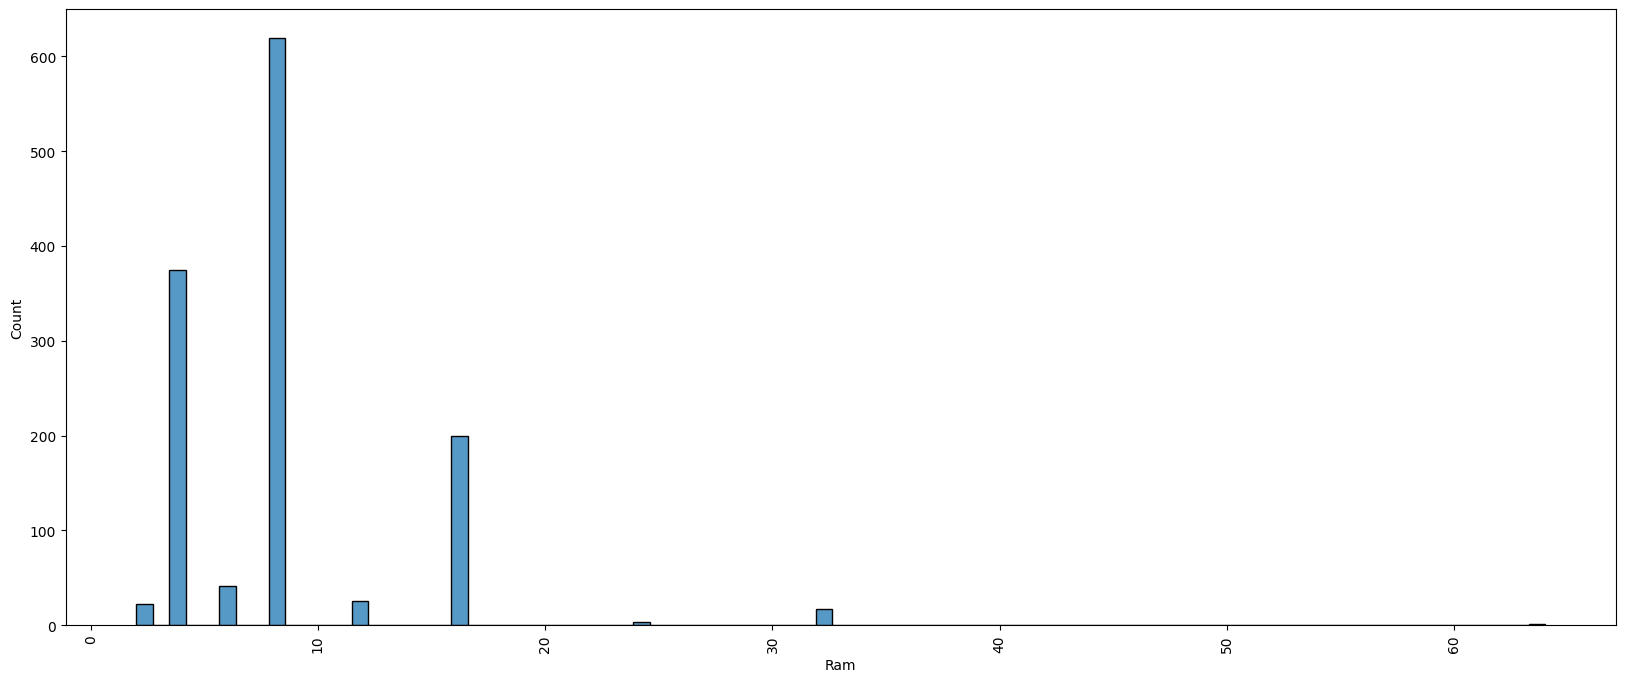

In [13]:
plt.figure(figsize=(20, 8))
sns.histplot(data["Ram"])
plt.xticks(rotation="vertical")
plt.show()

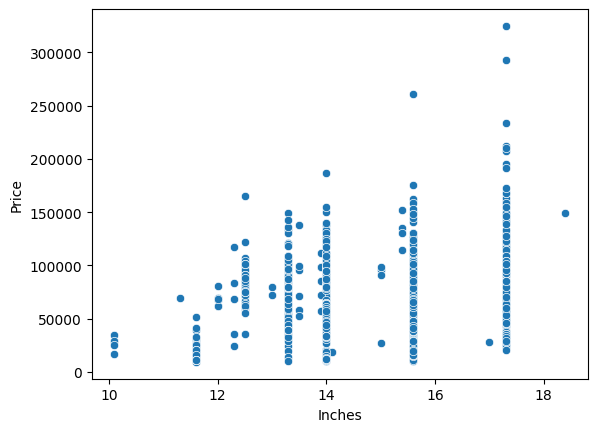

In [14]:
sns.scatterplot(x = data["Inches"], y = data["Price"]);

In [15]:
data["Touchscreen"] = data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [17]:
data["IPS"] = data["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [18]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [22]:
new = data["ScreenResolution"].str.split("x", n=1, expand=True)

In [23]:
data["x_res"] = new[0]
data["y_res"] = new[1]

In [24]:
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [73]:
for j,i in enumerate(data["x_res"].str.split()):
    data["x_res"][j] = i[-1]

C:\Users\osama\AppData\Local\Temp\ipykernel_17572\2850488128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["x_res"][j] = i[-1]
C:\Users\osama\AppData\Local\Temp\ipykernel_17572\2850488128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["x_res"][j] = i[-1]
C:\Users\osama\AppData\Local\Temp\ipykernel_17572\2850488128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["x_res"][j] = i[-1]
C:\Users\osama\AppData\Lo

In [78]:
data["x_res"] = data["x_res"].astype("int32")
data["y_res"] = data["y_res"].astype("int32")

In [80]:
data["ppi"] = ((data["x_res"]**2) + (data["y_res"]**2)) ** 0.5 / data["Inches"]

In [86]:
data.head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624


In [87]:
data = data.drop(columns=["ScreenResolution", "Inches"], axis=1)

In [88]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [90]:
La = LabelEncoder()
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = La.fit_transform(data[col])

In [91]:
data.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,1,4,65,8.0,4,58,8,1.37,71378.6832,0,1,2560,1600,226.983005
1,1,4,63,8.0,2,51,8,1.34,47895.5232,0,0,1440,900,127.677940
2,7,3,74,8.0,16,53,4,1.86,30636.0000,0,0,1920,1080,141.211998
3,1,4,85,16.0,29,9,8,1.83,135195.3360,0,1,2880,1800,220.534624
4,1,4,67,8.0,16,59,8,1.37,96095.8080,0,1,2560,1600,226.983005


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   int32  
 1   TypeName     1303 non-null   int32  
 2   Cpu          1303 non-null   int32  
 3   Ram          1303 non-null   float32
 4   Memory       1303 non-null   int32  
 5   Gpu          1303 non-null   int32  
 6   OpSys        1303 non-null   int32  
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  x_res        1303 non-null   int32  
 12  y_res        1303 non-null   int32  
 13  ppi          1303 non-null   float64
dtypes: float32(2), float64(2), int32(8), int64(2)
memory usage: 91.7 KB


## Splitting Data

In [93]:
x = data.drop(columns="Price", axis=1)
y= data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

## Building Model

### model 1 ==> RandomForest

In [129]:
model_RF = RandomForestRegressor(n_estimators=3000, 
                                  max_depth=500, 
                                  min_samples_leaf=1, 
                                  min_samples_split=4)

model_RF.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_RF.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_RF.score(x_test, y_test)}")

The predict Score Train is ==> 0.9627701035244661
%----------------------------------------------------------%
The predict Score Test is ==> 0.8428850609228982


### Model 2 ==> AdaBoost

In [148]:
model_AD = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=50, 
                                                             min_samples_leaf=10), 
                              n_estimators=500,
                             learning_rate=0.01)

model_AD.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD.score(x_test, y_test)}")

The predict Score Train is ==> 0.9299338901137937
%----------------------------------------------------------%
The predict Score Test is ==> 0.8408776113823638


### Model 3 ==> XGBoost

In [162]:
model_XGB = xgb.XGBRegressor()
model_XGB.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_XGB.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_XGB.score(x_test, y_test)}")

The predict Score Train is ==> 0.996181416494581
%----------------------------------------------------------%
The predict Score Test is ==> 0.8695628228108794


# Download Model

In [166]:
import pickle

In [169]:
pickle.dump(model_XGB, open("D:\Pycharm\model_pickle\laptob_price.pkl", "wb"))

# Make GUI

In [170]:
import streamlit as st

2023-07-29 06:01:19.960 
  command:

    streamlit run C:\Users\osama\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [172]:
model = pickle.load(open("D:\Pycharm\model_pickle\laptob_price.pkl", "rb"))

In [175]:
st.title("Laptob Price Predictor")
#Brand
company = st.selectbox("Brand", data["Company"].unique())

#Type
type = st.selectbox("Type", data["TypeName"].unique())

#RAm
ram = st.selectbox("Ram", [2, 4, 6, 8, 12, 16, 24, 32, 64])

# weight
weight = st.number_input("ll")

# Touch
touchscreen = st.selectbox("TouchScreen", ["Yes", "No"])

# IPS
ips = st.selectbox("IPS", ["Yes", "No"])

#Screen_size
Screen_size = st.number_input("Screen_size")

